In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
Diabetes = pd.read_csv("Diabetes 2.csv")

In [3]:
Diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
Diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


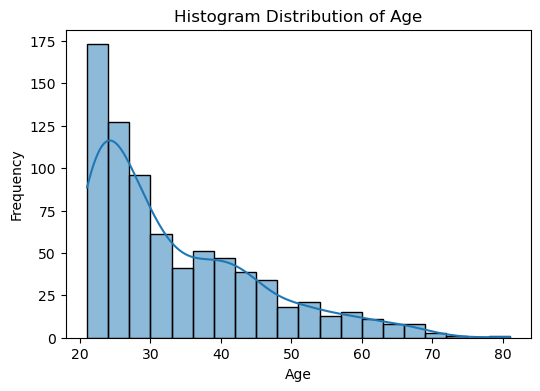

In [8]:
# Plotting a histogram of age distribution
plt.figure(figsize=(6, 4))
sns.histplot(Diabetes['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Age')
plt.show()

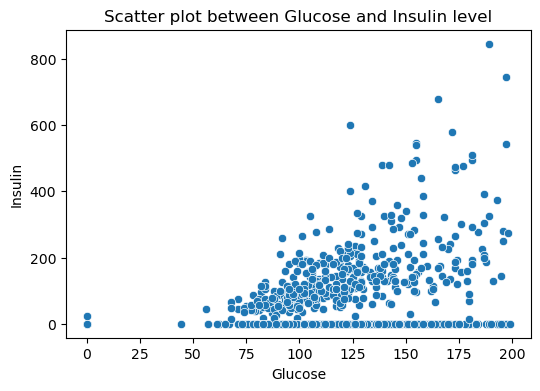

In [9]:
# Plotting a scatter plot of Glucose against insulin 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Diabetes, x='Glucose', y='Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot between Glucose and Insulin level')
plt.show()

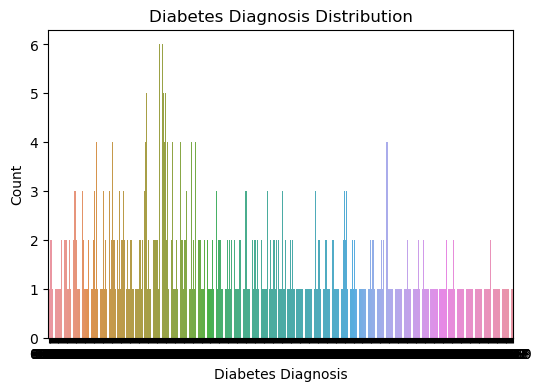

In [10]:
# Plotting a bar chart of diabetes diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='DiabetesPedigreeFunction', data=Diabetes)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.title('Diabetes Diagnosis Distribution')
plt.show()

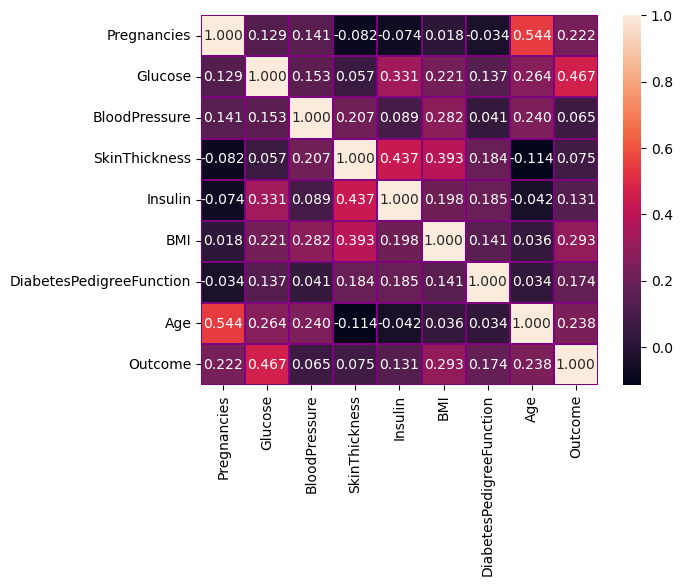

In [11]:
# calculate correlation matrix
correlation_matrix = Diabetes.corr()

# plot correlation matrix
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.3, linecolor = "purple", fmt = ".3f")
plt.show()

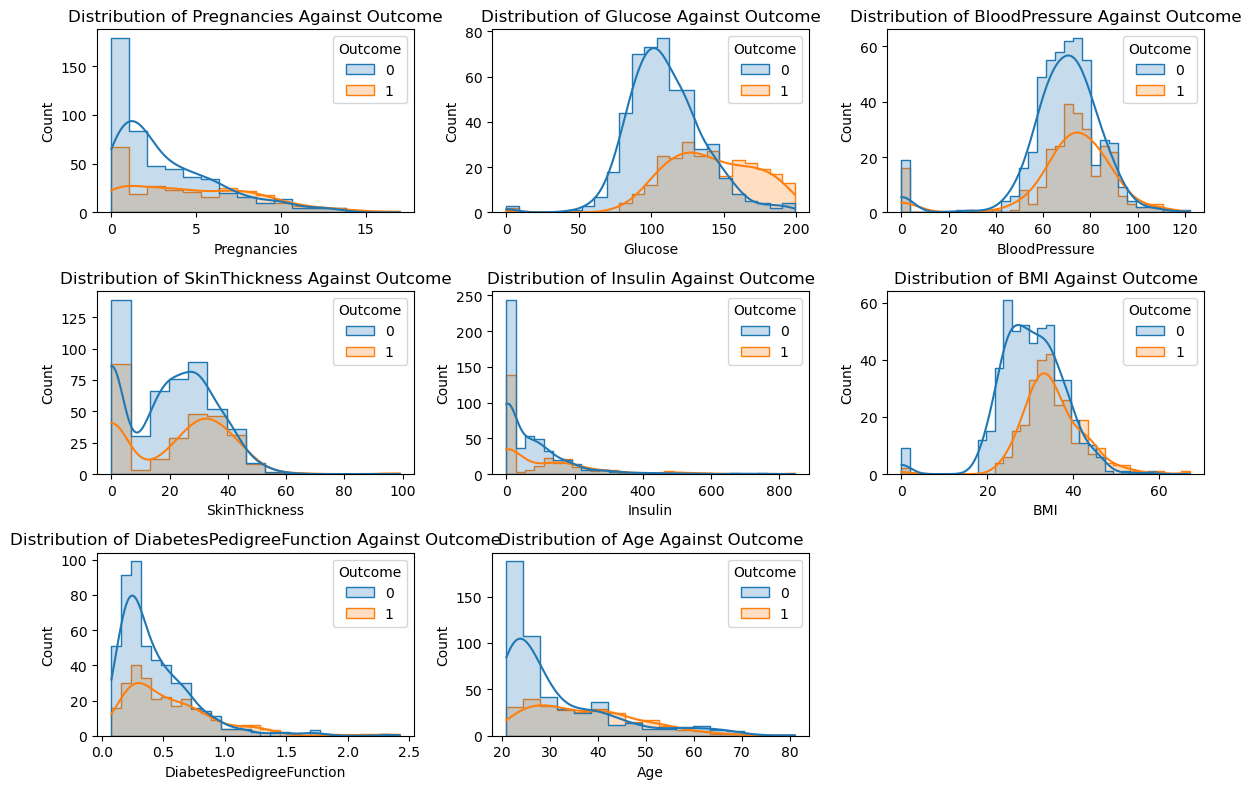

In [12]:
# Visualization 3: Distribution Plots
plt.figure(figsize=(12, 8))
for feature in Diabetes.columns[:-1]:  # Exclude 'Outcome' column
    plt.subplot(3, 3, Diabetes.columns.get_loc(feature) + 1)
    sns.histplot(data=Diabetes, x=feature, hue="Outcome", element="step", common_norm=False, kde=True)
    plt.title(f"Distribution of {feature} Against Outcome")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

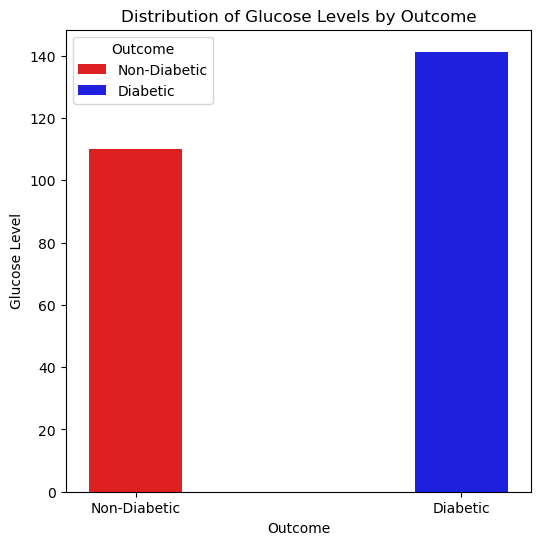

In [13]:
# Create a bar chart
plt.figure(figsize=(6, 6))
sns.barplot(data=Diabetes, x='Outcome', y='Glucose', ci=None, hue='Outcome', palette=['red', 'blue'])
plt.title('Distribution of Glucose Levels by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.xticks(ticks=[-0.2, 1.2], labels=['Non-Diabetic', 'Diabetic'])
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

In [14]:
target = Diabetes['Outcome']

In [15]:
from sklearn.model_selection import train_test_split

# Drop the 'Outcome' column
Diabetes.drop('Outcome', axis=1, inplace=True)

# Split data into features and target
x_train, x_test, y_train, y_test = train_test_split(
    Diabetes,  # Use the DataFrame without the 'Outcome' column
    target,    # Use the target variable that was previously extracted
    random_state=80,
    train_size=.6
)


In [16]:
print("Shape of y_train: ", y_train.shape)
print("Shape of x_train: ", x_train.shape)

Shape of y_train:  (460,)
Shape of x_train:  (460, 8)


In [17]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [18]:
# Random Forest
random_forest.fit(x_train, y_train)
predictions_rf = random_forest.predict(x_train)
random_forest_score = random_forest.score(x_test, y_test) * 100

In [19]:
# Printing scores of our Classifiers

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  75.64935064935064


In [20]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Generate predictions using the model and the test data
predictions_rf = rf_model.predict(x_test)

In [22]:
# Calculate confusion matrix using correct data
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[172  28]
 [ 47  61]]


Confusion matrix, without normalization


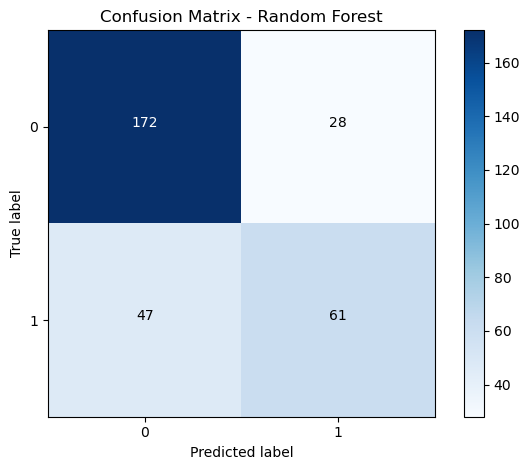

In [23]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [24]:
# The function below prints the following necessary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
print("Evaluation of Random Forest Model")
print()
metrics(y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.75649
Precision: 0.68539
Recall: 0.56481
F1-score: 0.61929
